#Extrovert vs. Introvert Behavior Data

## Problem statement
"Given a flask app user entering in information about themselves to a questionnaire, how closely do those traits align with them being an introvert, extrovert, or somewhere in the middle between those?"

In [1]:
# Import dataset to start working with it
import pandas as pd

df = pd.read_csv("../data/raw/personality_dataset.csv", sep=",")

## Exploration and data cleaning

In [2]:
print(f"Raw data shape: {df.shape}")
print(df.info())

Raw data shape: (2900, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None


The dataset's big enough to play with, but not too big overall.
It mas missing values in various columns, some of them numeric features, others categorical.
Am going to skip dropping duplicates because it seems pretty plausible two people could submit comparable responses.

In [3]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Split feature and target  
X = df.drop('Personality', axis=1)
y = df['Personality']

# Identify column types
numeric_features = ['Time_spent_Alone', 'Social_event_attendance', 
                    'Going_outside', 'Friends_circle_size', 'Post_frequency']
categorical_features = ['Stage_fear', 'Drained_after_socializing']


## Analysis of univariate variables

### categorical variables

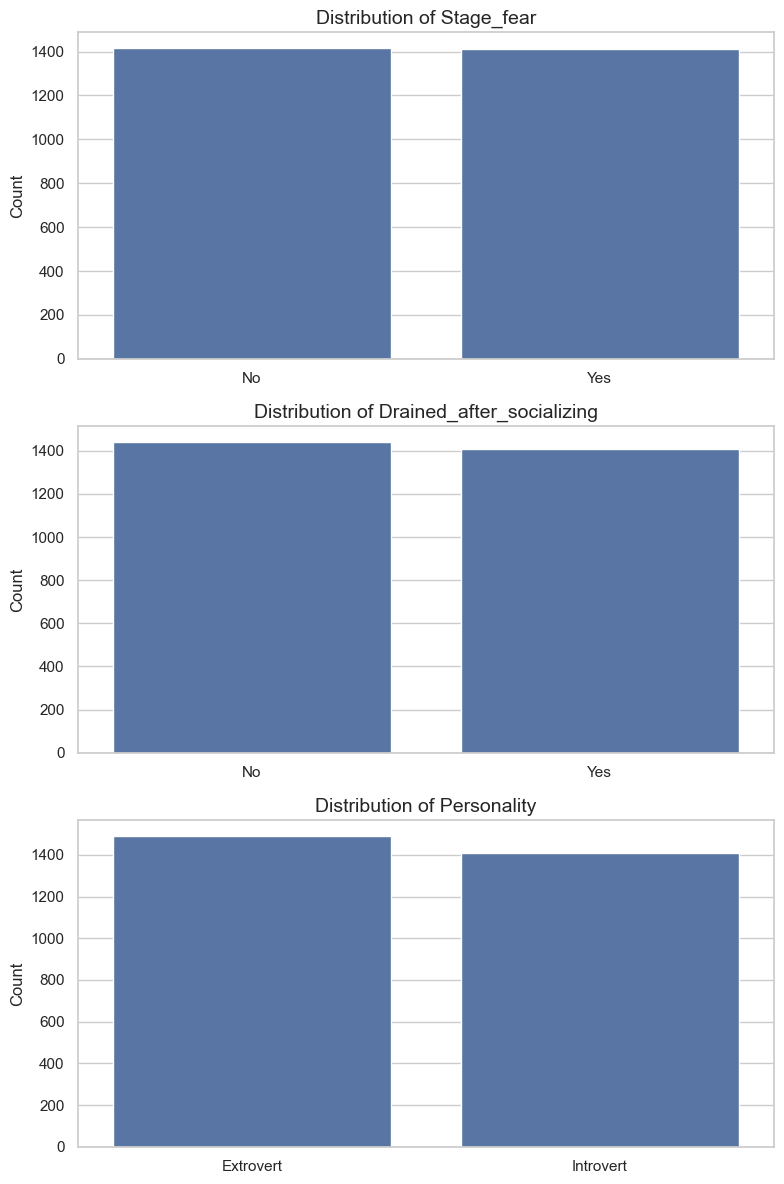

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# List of categorical columns to visualize
categorical_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']

# Create separate subplots vertically to avoid layout issues
fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=1, figsize=(8, 12))

for ax, col in zip(axes, categorical_cols):
    sns.countplot(data=df, x=col, ax=ax, )
    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


### numeric variables

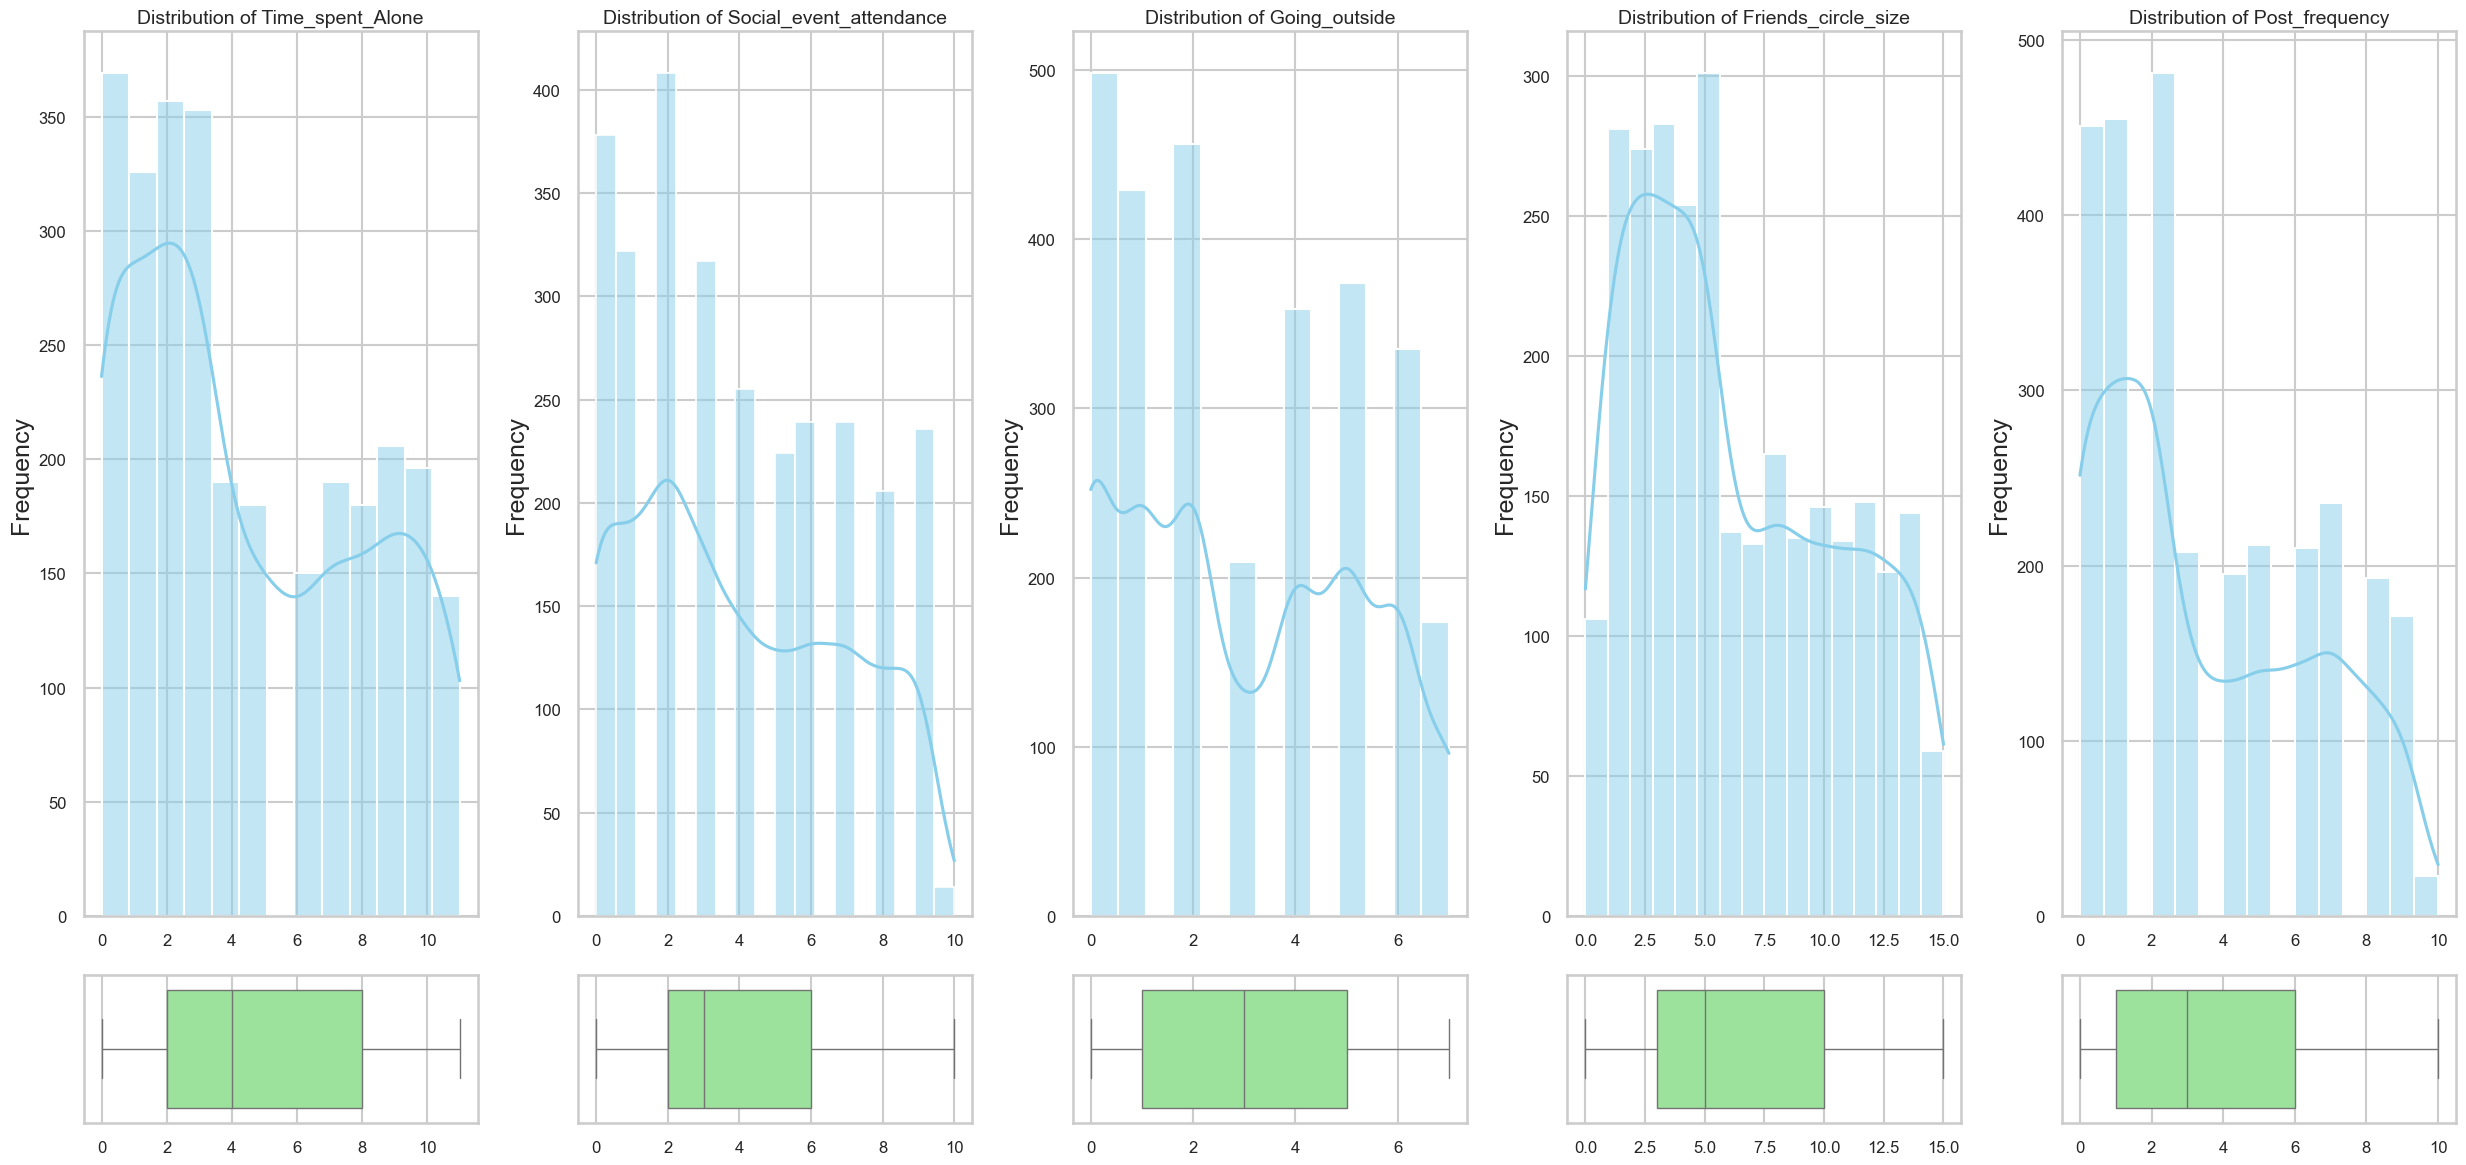

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style and scale all font elements
sns.set(style='whitegrid')
sns.set_context('talk')  # Boosts label and tick size for readability

numeric_variables = ['Time_spent_Alone', 'Social_event_attendance',
                     'Going_outside', 'Friends_circle_size', 'Post_frequency']

fig, axes = plt.subplots(
    nrows=2,
    ncols=len(numeric_variables),
    figsize=(5 * len(numeric_variables), 12),
    gridspec_kw={"height_ratios": [6, 1]}
)

for idx, col in enumerate(numeric_variables):
    sns.histplot(data=df, x=col, ax=axes[0, idx], kde=True, color='skyblue')
    axes[0, idx].set_title(f'Distribution of {col}', fontsize=14)
    axes[0, idx].set_xlabel('')
    axes[0, idx].set_ylabel('Frequency')
    axes[0, idx].tick_params(labelsize=12)

    sns.boxplot(data=df, x=col, ax=axes[1, idx], color='lightgreen')
    axes[1, idx].set_xlabel('')
    axes[1, idx].set_ylabel('')
    axes[1, idx].tick_params(labelsize=12)

plt.tight_layout()
plt.show()


## Analysis of multivariate variables

### Numerical-numerical analysis


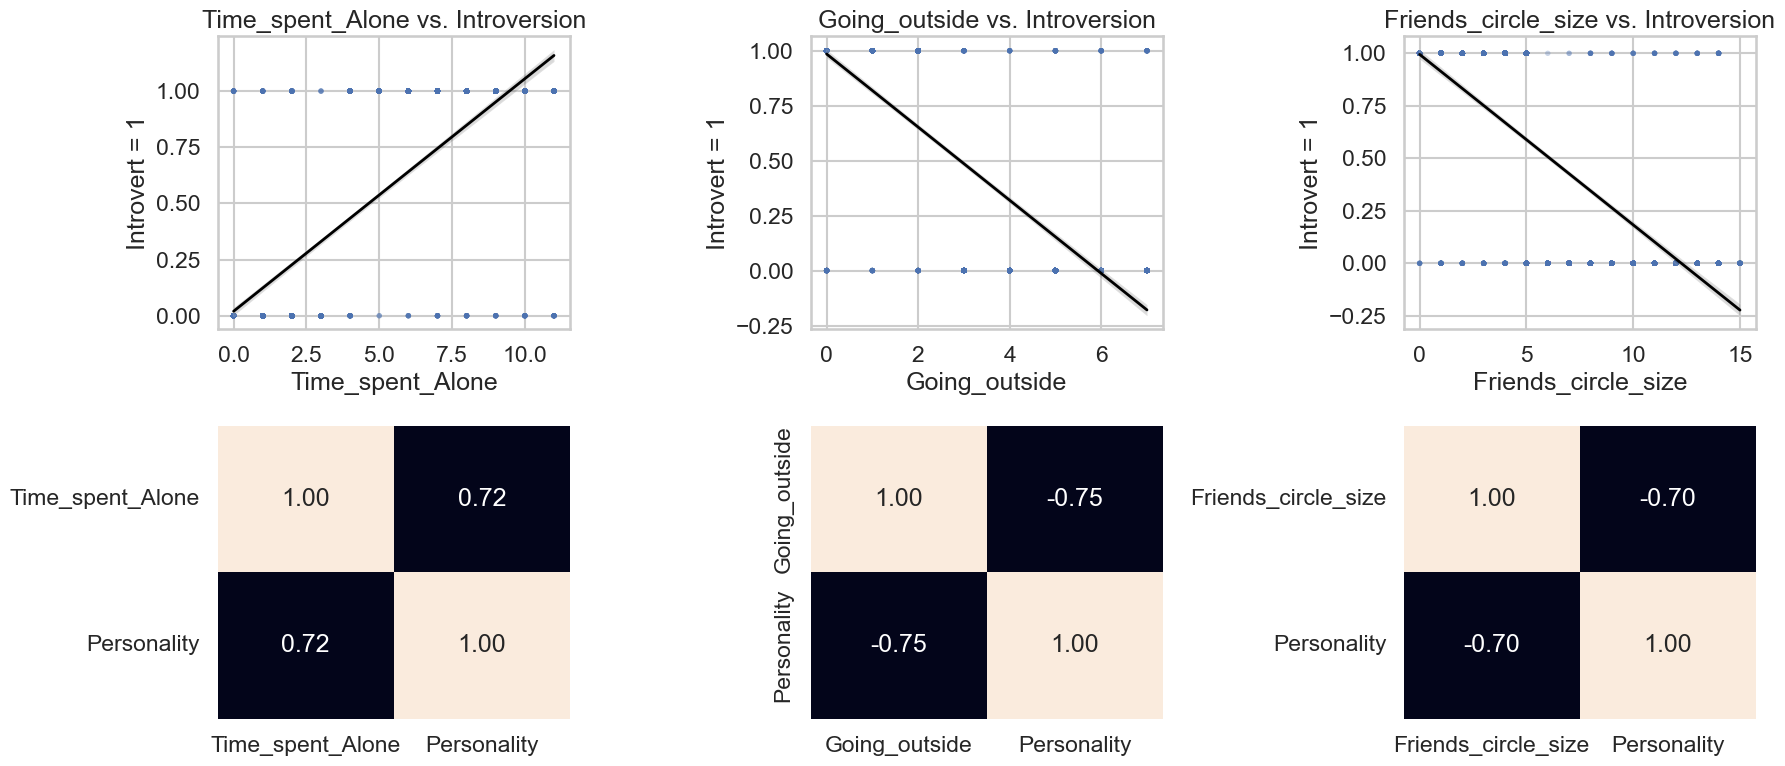

In [7]:
fig, axis = plt.subplots(2, 3, figsize=(18, 8))

# Shared styling
scatter_kws = {"s": 15, "alpha": 0.3, "edgecolor": "none"}
line_kws = {"color": "black", "lw": 2}

features = ['Time_spent_Alone', 'Going_outside', 'Friends_circle_size']
target = (df['Personality'] == 'Introvert').astype(int)

for i, feature in enumerate(features):
    sns.regplot(
        ax=axis[0, i],
        data=df,
        x=feature,
        y=target,
        scatter_kws=scatter_kws,
        line_kws=line_kws
    )
    axis[0, i].set_title(f'{feature} vs. Introversion')
    axis[0, i].set_ylabel('Introvert = 1')

    sns.heatmap(
        df[[feature]].assign(Personality=target).corr(),
        annot=True, fmt=".2f", ax=axis[1, i], cbar=False
    )

plt.tight_layout()
plt.show()


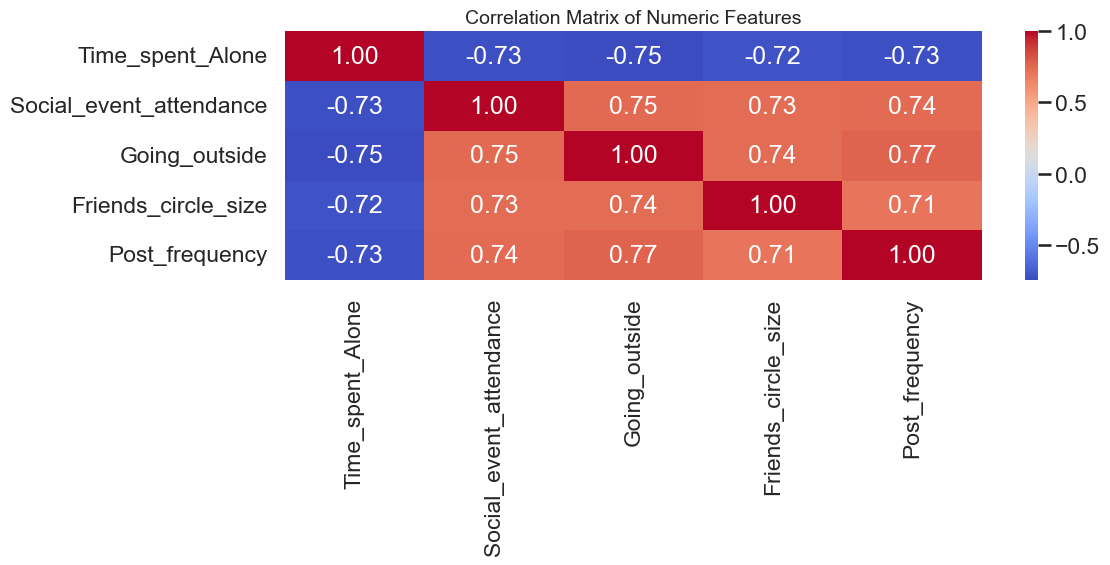

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[numeric_variables].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()


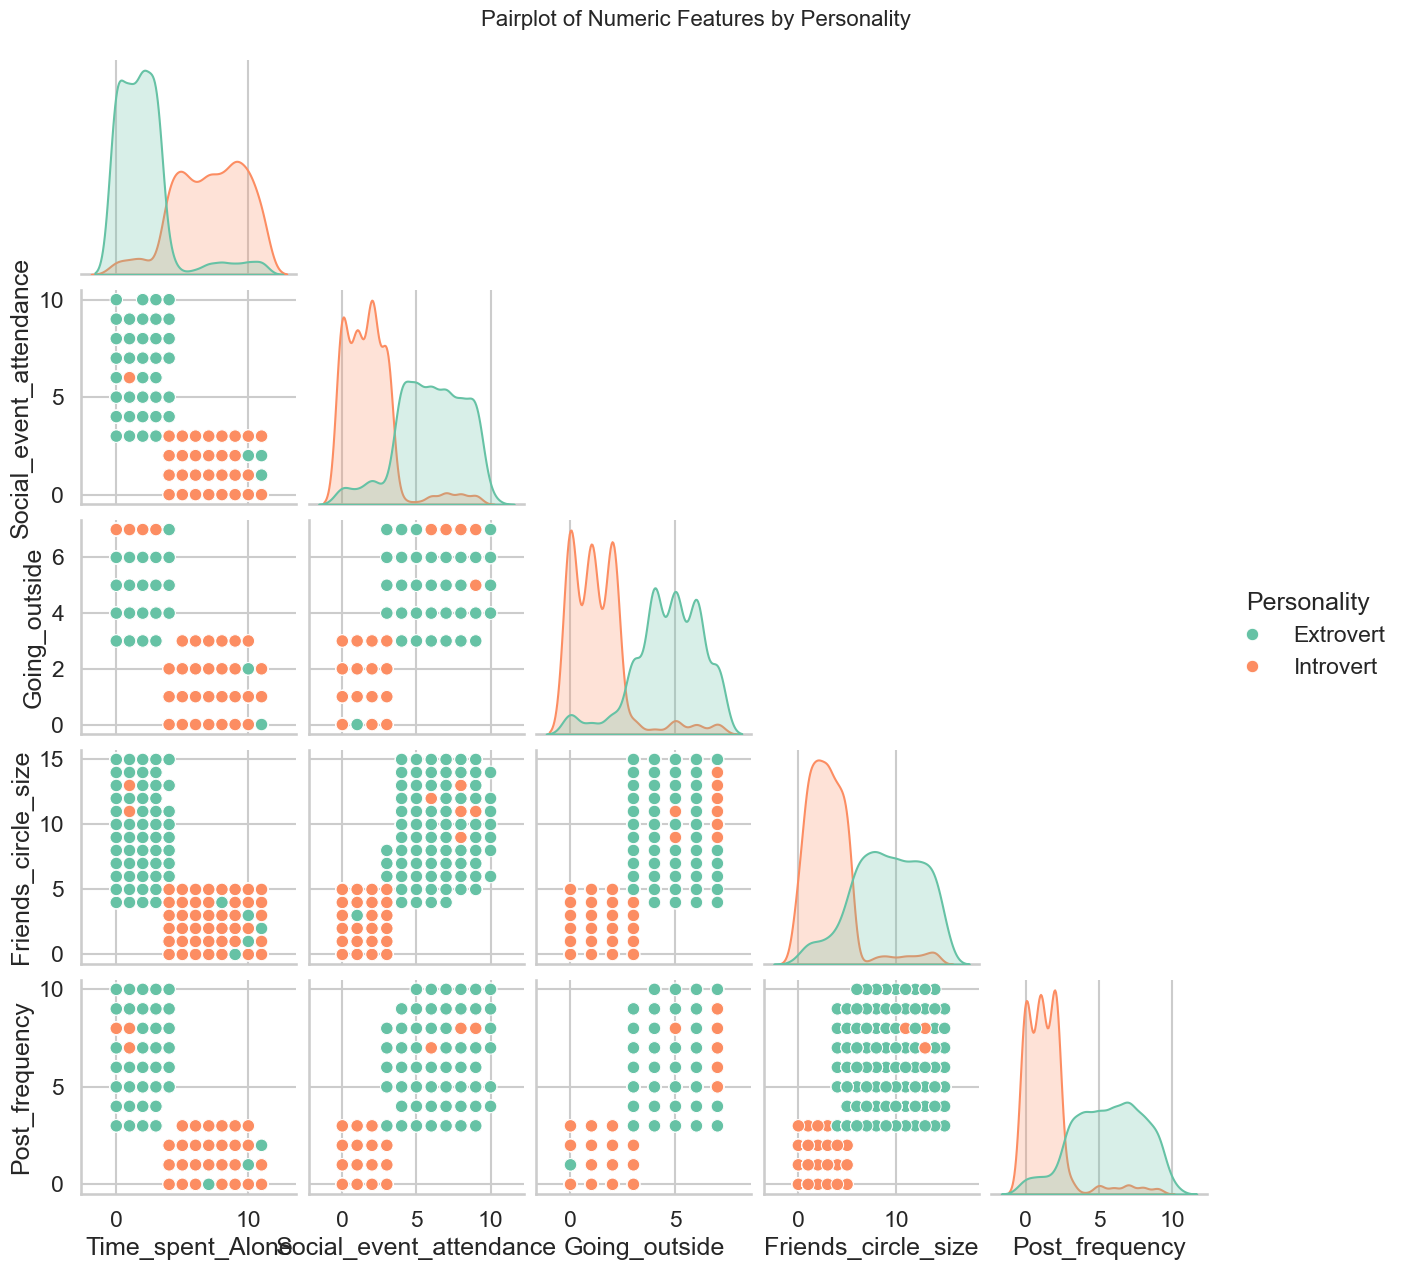

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric features and target
pairplot_features = numeric_variables + ['Personality']

# Subset the DataFrame for those columns
pairplot_df = df[pairplot_features].copy()

# Drop rows with missing values just for plotting clarity
pairplot_df.dropna(inplace=True)

# Create the pairplot
sns.pairplot(pairplot_df, hue='Personality', palette='Set2', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numeric Features by Personality", y=1.02, fontsize=16)
plt.show()


### categorical-categorical analysis


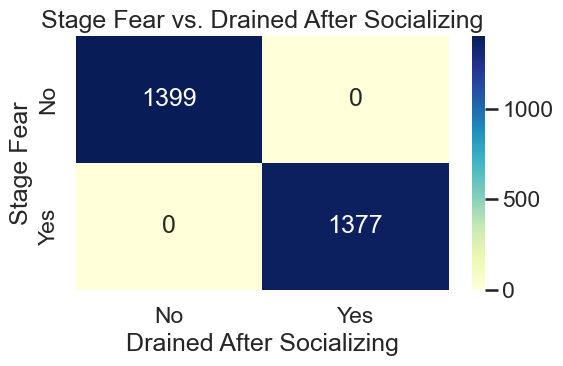

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crosstab of two binary features
cross_tab = pd.crosstab(df['Stage_fear'], df['Drained_after_socializing'])

plt.figure(figsize=(6, 4))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Stage Fear vs. Drained After Socializing')
plt.ylabel('Stage Fear')
plt.xlabel('Drained After Socializing')
plt.tight_layout()
plt.show()


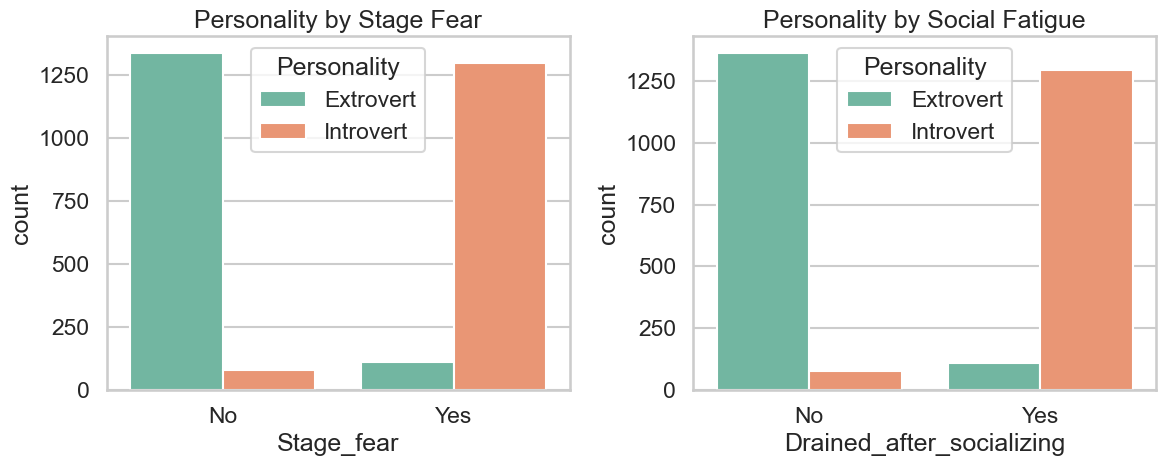

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df, x='Stage_fear', hue='Personality', ax=axes[0], palette='Set2')
axes[0].set_title('Personality by Stage Fear')

sns.countplot(data=df, x='Drained_after_socializing', hue='Personality', ax=axes[1], palette='Set2')
axes[1].set_title('Personality by Social Fatigue')

plt.tight_layout()
plt.show()


## Building decision tree mcdel


Because the dataset's small, am going to replace numerical missing values with the median of the column, and categorical missing values with the most common value in the column.

In [22]:
### More data preprocessing
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

# Encode the target variable
df = df.dropna(subset=['Personality'])  # drop rows with missing targets
le = LabelEncoder()
df['Personality_encoded'] = le.fit_transform(df['Personality'])

# Define feature groups
numeric_features = ['Time_spent_Alone', 'Social_event_attendance',
                    'Going_outside', 'Friends_circle_size', 'Post_frequency']

categorical_features = ['Stage_fear', 'Drained_after_socializing']

# Pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='if_binary'))  # Converts Yes/No to 0/1
])

# Combine transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Split the data
X = df[numeric_features + categorical_features]
y = df['Personality_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# The preprocessor is now ready for integration into a modeling pipeline


Comparing before and after imputing values

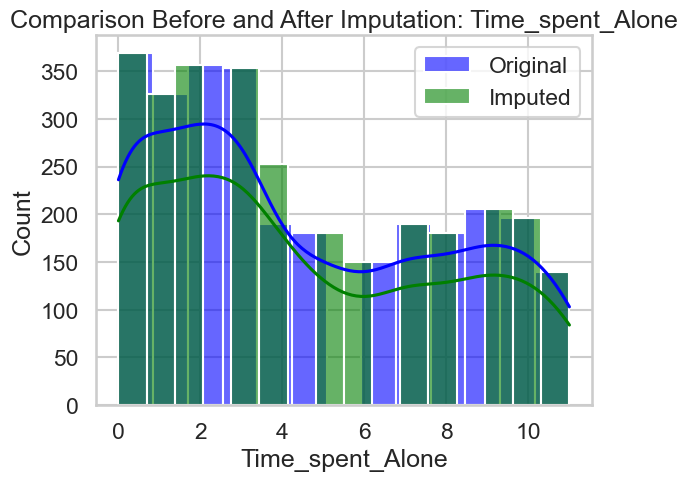

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Choose a numeric column with missing values
feature = 'Time_spent_Alone'

# Original (with NaNs dropped)
sns.histplot(df[feature].dropna(), kde=True, color='blue', label='Original', alpha=0.6)

# Imputed
imputer = SimpleImputer(strategy='median')
imputed = imputer.fit_transform(df[[feature]])
sns.histplot(imputed.ravel(), kde=True, color='green', label='Imputed', alpha=0.6)

plt.title(f'Comparison Before and After Imputation: {feature}')
plt.legend()
plt.show()


Comparing before vs. after dropping unknown-personality rows:

In [24]:
# Before cleaning
print("Before dropna:", df['Personality'].value_counts(normalize=True))

# After dropping nulls in X or y
df_cleaned = df.dropna(subset=numeric_features + categorical_features + ['Personality'])
print("After dropna:", df_cleaned['Personality'].value_counts(normalize=True))


Before dropna: Personality
Extrovert    0.514138
Introvert    0.485862
Name: proportion, dtype: float64
After dropna: Personality
Extrovert    0.514332
Introvert    0.485668
Name: proportion, dtype: float64


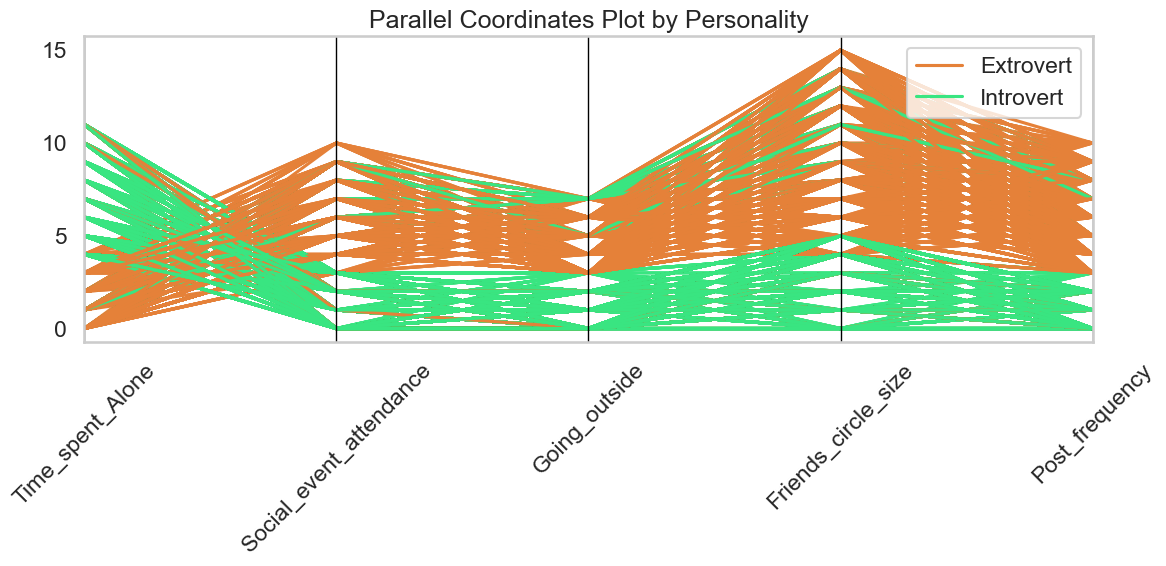

In [29]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd

# Create a copy with no nulls for plotting
plot_df = df[numeric_variables + ['Personality']].dropna().copy()

# Encode Personality to numeric for coloring
le = LabelEncoder()
plot_df['Personality_encoded'] = le.fit_transform(plot_df['Personality'])

# Parallel coordinates plot
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(
    plot_df[numeric_variables + ['Personality']],
    class_column='Personality',
    color=["#E58139", "#39E581"]  # Colors for Extrovert, Introvert
)
plt.title("Parallel Coordinates Plot by Personality")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Orange line for extroversion pretty consistently splits from introvert green line for categories like friends circle size or post history.
Interesting to see there does seem to be a cohort of introverts who like spending time outside at least as much or more than extroverts.

### Preprocessing pipeline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define feature lists
numeric_features = ['Time_spent_Alone', 'Social_event_attendance',
                    'Going_outside', 'Friends_circle_size', 'Post_frequency']
categorical_features = ['Stage_fear', 'Drained_after_socializing']

# Define transformers
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())  # Needed for logistic, optional for RF
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))
])

# Combine into a single ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Allows swapping out model.
# Random forest would be slower to make inferences, and feature importance plots aren't as intuitive as weights.  
# But Random forest would allow handling interactions between features in a way logistic regression sounds like it can't.
model = LogisticRegression(max_iter=1000, random_state=42)
# model = RandomForestClassifier(n_estimators=100, random_state=42)

# Full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Train/test split
X = df[numeric_features + categorical_features]
y = df['Personality_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Time_spent_Alone',
                                                   'Social_event_attendance',
                                                   'Going_outside',
                                                   'Friends_circle_size',
                                                   'Post_frequency']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Stage_fear',
                                                   'Drained_after_socializing'])])),
                ('model', LogisticRegression(max_iter=1000, random_state=42))])

In [31]:

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.9186206896551724
Precision: 0.8991825613079019
Recall: 0.9375
F1 Score: 0.9179415855354659


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Adjusted evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
              precision    recall  f1-score   support

   Extrovert       0.94      0.90      0.92       373
   Introvert       0.90      0.94      0.92       352

    accuracy                           0.92       725
   macro avg       0.92      0.92      0.92       725
weighted avg       0.92      0.92      0.92       725

